In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

1. Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.

In [2]:
winter = cv.imread('winter.jfif',0)

#apply histogram equalisation
winter1 = cv.equalizeHist (winter)

#apply histogram equalisation
winter2 = cv.equalizeHist (winter1)

cv.imshow("winter 1",winter1)
cv.imshow("winter 2",winter2)
cv.waitKey(0) 
cv.destroyAllWindows()

#comments: There are no difference between first and second output image

2. Load the image 'electronic.jfif'. Then,
<ol type="I">
  <li>Experiment with different kernel size. Which kernel size is the most appropriate? </li>
  <li>Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.</li>
  <li>Try Laplacian of Gaussian</li>  
</ol>   
Based on the exercise conducted from (A) - (C), which image processing pathway is optimal? Justify your answer.

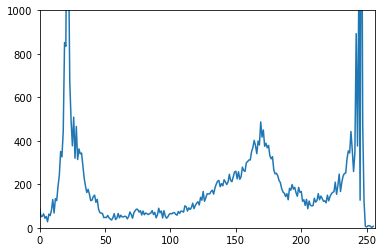

In [3]:
img = cv.imread('electronic.jfif',0)

#Threshold
hist = cv.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)
plt.xlim([0,256])
plt.ylim([0,1000])
plt.show()

(<matplotlib.image.AxesImage at 0x1bf8ab09040>, ([], []), ([], []))

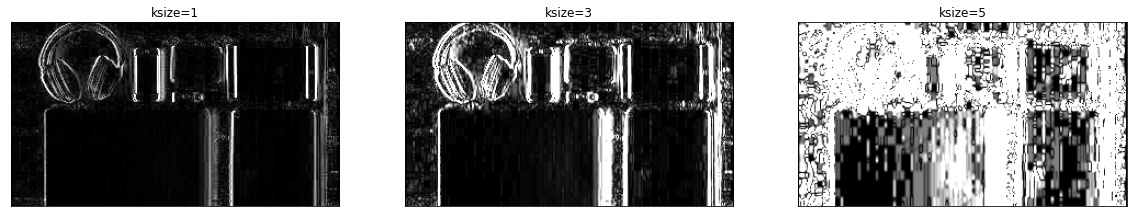

In [4]:
#Question 2A
electronic = cv.imread('electronic.jfif',0)

#k size = 1
sobelx_1 = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 1)
sobely_1 = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 1)

abs_sobelx_u8_1 = cv.convertScaleAbs(sobelx_1)
abs_sobely_u8_1 = cv.convertScaleAbs(sobely_1)

map_edge_1 = cv.add(abs_sobelx_u8_1, abs_sobely_u8_1)

#k size = 3
sobelx_3 = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 3)
sobely_3 = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 3)

abs_sobelx_u8_3 = cv.convertScaleAbs(sobelx_3)
abs_sobely_u8_3 = cv.convertScaleAbs(sobely_3)

map_edge_3 = cv.add(abs_sobelx_u8_3, abs_sobely_u8_3)

#k size = 5
sobelx_5 = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 5)
sobely_5 = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 5)

abs_sobelx_u8_5 = cv.convertScaleAbs(sobelx_5)
abs_sobely_u8_5 = cv.convertScaleAbs(sobely_5)

map_edge_5 = cv.add(abs_sobelx_u8_5, abs_sobely_u8_5)


#Output for all picture with different ksize
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("ksize=1")
plt.imshow(map_edge_1,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2)
plt.title("ksize=3")
plt.imshow(map_edge_3,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3)
plt.title("ksize=5")
plt.imshow(map_edge_5,'gray'), plt.xticks([]), plt.yticks([])

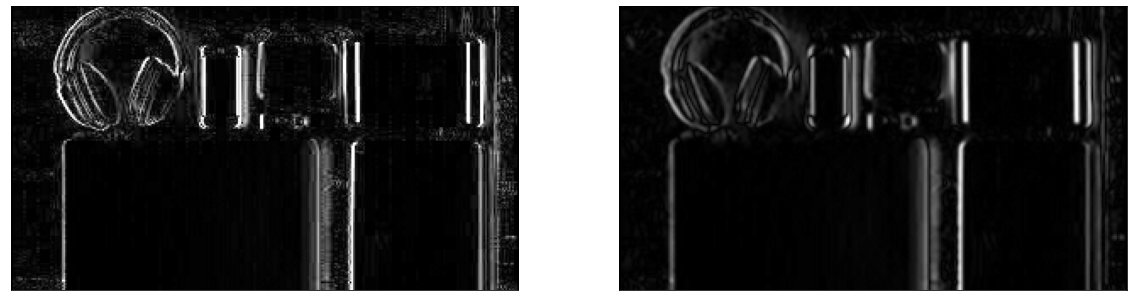

In [11]:
#Question 2B
electronic = cv.imread('electronic.jfif',0)

#Sobel without blur
sobelx = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 1)
sobely = cv.Sobel(electronic, cv.CV_64F ,1, 0, ksize = 1)

abs_sobelx_u8 = cv.convertScaleAbs(sobelx)
abs_sobely_u8 = cv.convertScaleAbs(sobely)

map_edge = cv.add(abs_sobelx_u8, abs_sobely_u8)

#sobel with blur
electronic_blur = cv.GaussianBlur(electronic, (5, 5), 0)

sobelx_blur = cv.Sobel(electronic_blur, cv.CV_64F ,1, 0, ksize = 1)
sobely_blur = cv.Sobel(electronic_blur, cv.CV_64F ,1, 0, ksize = 1)

abs_sobelx_u8_blur = cv.convertScaleAbs(sobelx_blur)
abs_sobely_u8_blur = cv.convertScaleAbs(sobely_blur)

map_edge_blur = cv.add(abs_sobelx_u8_blur, abs_sobely_u8_blur)


#Output
plt.figure(figsize = (20, 20))
plt.subplot(1,2,1)
plt.imshow(map_edge,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(map_edge_blur,'gray'), plt.xticks([]), plt.yticks([])
plt.show()

(<matplotlib.image.AxesImage at 0x1bf89f2b160>, ([], []), ([], []))

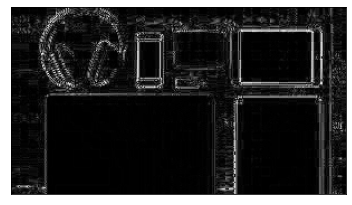

In [5]:
#Question 2C
electronic = cv.imread('electronic.jfif',0)

laplacian = cv.Laplacian(electronic, cv.CV_64F, ksize = 1)
laplacian_8u = np.uint8(np.absolute(laplacian))

plt.subplot(1,1,1)
plt.imshow(laplacian_8u,'gray'), plt.xticks([]), plt.yticks([])

3. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

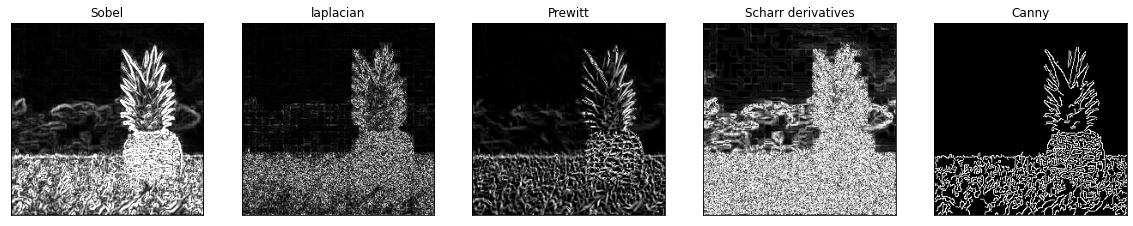

In [6]:
#Question 3

#read the pineapple image
pineapple = cv.imread('pineapple.jfif',0)


#edge detector: sobel
sobelx = cv.Sobel(pineapple, cv.CV_64F ,1, 0, ksize = 3)
sobely = cv.Sobel(pineapple, cv.CV_64F , 0, 1, ksize = 3)

abs_sobelx_u8 = cv.convertScaleAbs(sobelx)
abs_sobely_u8 = cv.convertScaleAbs(sobely)

map_edge = cv.add(abs_sobelx_u8, abs_sobely_u8)


#edge detector: Laplacian
laplacian = cv.Laplacian(pineapple, cv.CV_64F, ksize = 3)
laplacian_64F = np.uint8(np.absolute(laplacian))


#edge detector: Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
pineapple_prewittx = cv.filter2D(pineapple, -1, kernelx)
pineapple_prewitty = cv.filter2D(pineapple, -1, kernely)
prewitt = pineapple_prewittx + pineapple_prewitty


#edge detector: Scharr derivatives
scharr_X = cv.Scharr(pineapple, cv.CV_64F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X)) 
scharr_Y = cv.Scharr(pineapple, cv.CV_64F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 

scharr_XY_combined = cv.bitwise_or(scharr_Y_abs,scharr_X_abs)


#edge detector: Canny operators
edges = cv.Canny(pineapple,100,300,apertureSize=3, L2gradient = False)

#output
plt.figure(figsize = (20,20))
plt.subplot(1,5,1)
plt.title('Sobel')
plt.imshow(map_edge, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2)
plt.title('laplacian')
plt.imshow(laplacian_64F, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3)
plt.title('Prewitt')
plt.imshow(prewitt, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4)
plt.title('Scharr derivatives')
plt.imshow(scharr_XY_combined, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5)
plt.title('Canny')
plt.imshow(edges, 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

# Canny edge detector performs the best
# Scharr deriavatives performs the worst


4. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects. 

In [7]:
#Question 4
electronic = cv.imread('electronic.jfif')
electronic= cv.bilateralFilter(electronic, 8, 20, 5)
electronic_gray = cv.cvtColor(electronic, cv.COLOR_BGR2GRAY)
    
windowname = "window"
thresh = 182


canny_output = cv.Canny(electronic_gray, thresh, int(2.5*thresh))

contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#draw contours

electronic_bgr = cv.imread('electronic.jfif')


x, y, w, h = cv.boundingRect(contours[5])
cv.rectangle(electronic_bgr, (x,y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)

cv.imshow(windowname,electronic_bgr)
cv.waitKey(0)
cv.destroyAllWindows()